##### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report

In [16]:
from sklearn.linear_model import LogisticRegression

###### Loading data set

In [2]:
df = pd.read_csv('Model_data.csv')
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,0.675325,1,0.0,0.625,0.375887,0,0.5,0.831683,0,0.161290,1.0,0.50,1.000000,0
1,1,0.688312,1,0.0,0.700,0.359929,1,0.0,0.767327,1,0.500000,0.0,0.00,1.000000,0
2,2,0.909091,1,0.0,0.725,0.308511,0,0.5,0.618812,1,0.419355,0.0,0.00,1.000000,0
3,3,0.792208,1,0.0,0.740,0.359929,0,0.5,0.797030,0,0.000000,1.0,0.25,1.000000,0
4,4,0.805195,0,0.0,0.690,0.521277,1,0.5,0.524752,0,0.306452,0.5,0.75,0.666667,0


In [6]:
# removing 'Unnamed: 0' column
df.drop('Unnamed: 0', axis = 1, inplace = True)

**Separating features (X) and target variable (y)**

In [7]:
X = df.drop('target', axis = 1)
y = df['target']

In [8]:
X.shape

(1025, 13)

In [9]:
y.shape

(1025,)

**Splitting the Data into train and test set**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
X_train.shape, y_train.shape

((717, 13), (717,))

In [12]:
X_test.shape, y_test.shape

((308, 13), (308,))

**Implementing Classifiers**

In [14]:
# Creating a pipeline with multiple steps
from sklearn.pipeline import Pipeline

In [17]:
# Defining a list of classifiers to test
classifiers = [
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=3)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Logistic Regression', LogisticRegression())
]

# Iterate through each classifier, create a pipeline, and evaluate it
for clf_name, classifier in classifiers:
    # Create a pipeline with multiple steps
    steps = [
        ('scaler', StandardScaler()),  # Standardize the features
        ('classifier', classifier)  # Classification model
    ]

    # Create the pipeline
    pipeline = Pipeline(steps)

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f'Classifier: {clf_name}')
    print(f'Accuracy: {accuracy}')
    print(f'Classification Report:\n{report}')
    print('-' * 50)

Classifier: Random Forest
Accuracy: 0.9805194805194806
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

--------------------------------------------------
Classifier: SVM
Accuracy: 0.8896103896103896
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       159
           1       0.86      0.92      0.89       149

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.89      0.89      0.89       308

--------------------------------------------------
Classifier: K-Nearest Neighbors
Accuracy: 0.935064935064935
Classification Report:
              p

**Great, by considering above evaluation Random forest performed very well so i going to store random forest model for future predictions.**

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
# Creating a random forest classifier
random_forest = RandomForestClassifier()

# Training the model on the training data
random_forest.fit(X_train, y_train)

# Making predictions
y_pred_rf = random_forest.predict(X_test)

In [22]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

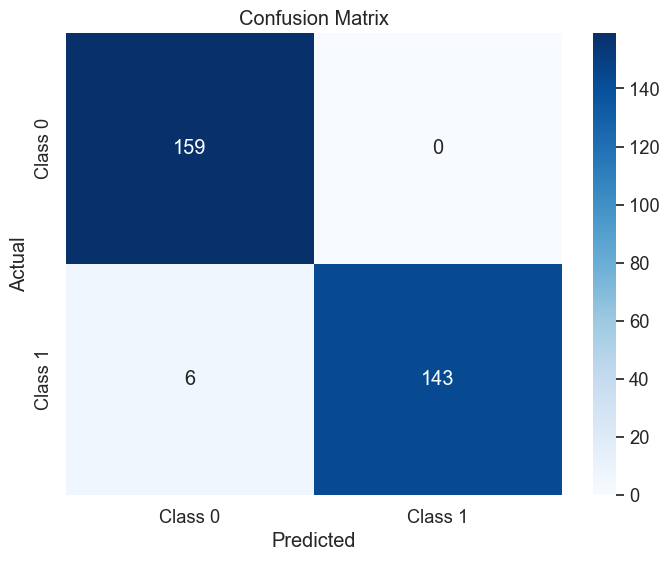

In [26]:
# Defining class labels
class_labels = ["Class 0", "Class 1"]

# Creating a Seaborn heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.set(font_scale=1.2)  # Adjust font scale for labels
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the heatmap
plt.show()

In [28]:
print(classification_rep_rf)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



In [29]:
print(f"Logistic Regression Accuracy: {accuracy_rf}")

Logistic Regression Accuracy: 0.9805194805194806


**Considering the above results, Random Forest Classifier performed well with accuracy of 98 percent. which is great.**

Dumping the Decision Tree Model for future utilization.

In [30]:
import joblib

In [31]:
# Saving the model
joblib.dump(random_forest, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [32]:
# loading the model
loaded_rfm = joblib.load('random_forest_model.pkl')

In [33]:
predictions = loaded_rfm.predict(X_test)

In [34]:
# Evaluating accuracy 
accuracy = accuracy_score(y_test, predictions)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.9805194805194806


Great!!